# Basic insight

Path2Insight can provide insight in large collections of static file paths. This pages gives a short introduction in gaining basic insight in a collection of file paths. Topics are counting and comparing in file path collections.

In [1]:
# this is a hidden cell

%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import sys
import pandas

# small trick to find Path2Insight at the moment
sys.path.append("../")

In [2]:
import path2insight

Path2Insight comes with sample collections of file paths. These collections/datasets were collected from the internet and were publicly available at the time of collection. For the examples on this page, the Ensembl dataset was used. Ensembl is a genome browser for vertebrate genomes. The data can be found at ftp://ftp.ensembl.org/pub/release-90/. The dataset contains 51100 filepaths.

In [3]:
from path2insight.datasets import load_ensembl

data = load_ensembl()

The object `data` is a list with `PosixFilePath` objects. These `PosixFilePath` objects contain the file paths. The file paths are stored in `PosixFilePath` object because they were collected with a Posix device. To give you an indication of the first filepaths, we output the first 5 elements of the list:

In [4]:
data[:5]

[PosixFilePath('/Volumes/release-90/README'),
 PosixFilePath('/Volumes/release-90/xml/ensembl-compara/homologies/README.gene_trees.xml_dumps.txt'),
 PosixFilePath('/Volumes/release-90/xml/ensembl-compara/homologies/MD5SUM'),
 PosixFilePath('/Volumes/release-90/xml/ensembl-compara/homologies/Compara.90.protein_murinae.tree.phyloxml.xml.tar.gz'),
 PosixFilePath('/Volumes/release-90/xml/ensembl-compara/homologies/Compara.90.protein_murinae.tree.orthoxml.xml.tar.gz')]

## Counting

Counting is a very intuitive way to explore all kind of things. The same holds for file paths. In this section, we explore the collection of file paths based on some simple counts like the folder depth, the extension and the stem.

In [5]:
path2insight.depth_counts(data)

Counter({3: 1, 4: 11, 5: 39424, 6: 5543, 7: 2733, 8: 3388})

In [6]:
path2insight.depth_counts(data, normalize=True)

Counter({3: 1.9569471624266145e-05,
         4: 0.00021526418786692759,
         5: 0.7715068493150685,
         6: 0.10847358121330725,
         7: 0.05348336594911937,
         8: 0.0663013698630137})

It is easy to visualize the data with matplotlib or pandas:

<Container object of 6 artists>

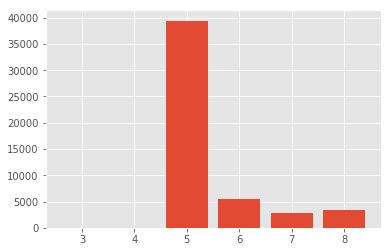

In [7]:
result = path2insight.depth_counts(data)

import matplotlib.pyplot as plt
plt.bar(*zip(*result.items()))

# another option:
# pandas.Series(result).plot.bar()

One can see that a depth of 5 is very common. Keep in mind that we are starting at 3. The actual number is not so informative, the distribution is. This data server has a very flat distribution of folders and files. 

It is also easy to compute the mean and variance of the depth. 

In [8]:
import numpy

depth = [path.depth for path in data]

print(numpy.mean(depth))
print(numpy.var(depth))

5.41409001957
0.747942371544


Extensions can be very informative. Large research data servers may contain more than hundred different file extensions. From that perspective, the file extension becomes very informative. Path2Insight contains functions to explore file extensions. File extension always start with a dot (.) in the Path2Insight. See Wikipedia for more information about definitions and remarks on filename extensions.  https://en.wikipedia.org/wiki/Filename_extension

In [9]:
path2insight.extension_counts(data)

Counter({'': 3094,
         '.4_sauropsids_EPO': 1,
         '.7_sauropsids_EPO_LOW_COVERAGE': 1,
         '.8_primates_EPO': 1,
         '.bb': 847,
         '.fai': 69,
         '.graph': 198,
         '.gz': 44427,
         '.gzi': 69,
         '.maf': 2,
         '.md5': 1,
         '.nal': 3,
         '.nhr': 349,
         '.nin': 349,
         '.nsq': 349,
         '.ova': 1,
         '.pdf': 1,
         '.phr': 250,
         '.pin': 250,
         '.psq': 250,
         '.sh': 2,
         '.tar': 74,
         '.tbi': 72,
         '.tsv': 336,
         '.txt': 102,
         '.vcf': 2})

The number of extensions can be large. The functions like `extension_counts` return a python `collections.Counter` object. This object has useful properties and methods like `.most_common()`. Use the following code to output and order the 10 most used extensions:

In [10]:
path2insight.extension_counts(data).most_common(10)

[('.gz', 44427),
 ('', 3094),
 ('.bb', 847),
 ('.nsq', 349),
 ('.nin', 349),
 ('.nhr', 349),
 ('.tsv', 336),
 ('.psq', 250),
 ('.pin', 250),
 ('.phr', 250)]

Files can have multiple extensions. The number of extension occurrences is distributed as follows: 

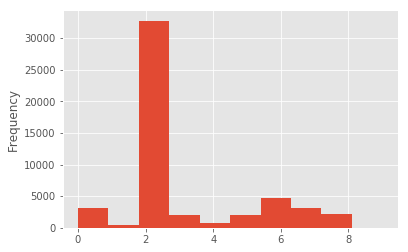

In [11]:
number_of_extensions_list = [len(path.extensions) for path in data]

pandas.Series(number_of_extensions_list).plot.hist()

Path2insight can also be used to count other file path properties in file path collections. The following examples show how to count the stem occurrences and tokens. See the API reference for all counters. 

In [12]:
path2insight.stem_counts(data).most_common(10)

[('CHECKSUMS', 2222),
 ('README', 762),
 ('meta.txt', 271),
 ('seq_region.txt', 267),
 ('meta_coord.txt', 267),
 ('coord_system.txt', 267),
 ('external_db.txt', 245),
 ('analysis_description.txt', 245),
 ('xref.txt', 244),
 ('unmapped_reason.txt', 244)]

In [13]:
# lowercase stems (no difference in counts)
path2insight.stem_counts([path.lower() for path in data]).most_common(10)

[('checksums', 2222),
 ('readme', 762),
 ('meta.txt', 271),
 ('seq_region.txt', 267),
 ('meta_coord.txt', 267),
 ('coord_system.txt', 267),
 ('external_db.txt', 245),
 ('analysis_description.txt', 245),
 ('xref.txt', 244),
 ('unmapped_reason.txt', 244)]

Counting tokens

In [14]:
data[100].tokenize()

['Volumes',
 'release',
 '90',
 'variation',
 'vcf',
 'mus',
 'musculus',
 'Mus',
 'musculus']

In [15]:
path2insight.token_counts(data).most_common(10)

[('txt', 31977),
 ('gene', 13798),
 ('ensembl', 12727),
 ('dm', 12500),
 ('homolog', 7380),
 ('fa', 5890),
 ('chromosome', 5011),
 ('feature', 4878),
 ('dna', 4608),
 ('90', 3404)]

## Compare collections


In [16]:
# subset of data
data_tetraodon_nigroviridis = path2insight.select(
    data, level3='gff3', level4='tetraodon_nigroviridis')

# subset of data
data_taeniopygia_guttata = path2insight.select(
    data, level3='gff3', level4='taeniopygia_guttata')

### String similarity
In the following example, the two datasets are compared on the string similarity of the file path stem. 0 is completely identical and 1 is completely distinct. It turns out that most of the file stems are partially similar. A few file stems are quite unique and 2 file paths are nearly (or exactly identical).

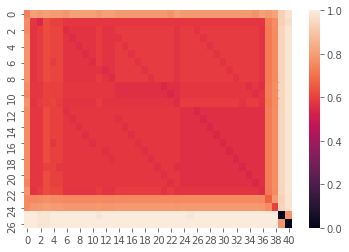

In [17]:
m = path2insight.levenshtein_distance_stem(
    data_tetraodon_nigroviridis, data_taeniopygia_guttata,
    normalise=True
)

import seaborn as sns
sns.heatmap(m, vmin=0)

### Hypothesis testing

Compare file extensions with the Chi-squared test. It turns out that the p-value is 0.0249. 

In [18]:
path2insight.extension_chisquare(
    data_tetraodon_nigroviridis, data_taeniopygia_guttata)

Power_divergenceResult(statistic=5.0256410256410255, pvalue=0.024974679293054206)